In [ ]:
%cd /content/drive/MyDrive/Prediction/Rangpur_Region

/content/drive/MyDrive/Prediction/Rangpur_Region


In [ ]:
import numpy as np

from sklearn.cluster import KMeans

from sklearn.model_selection import KFold

import time
import os
import csv
import matplotlib.pyplot as plt

In [ ]:
"""
Class for managing our data.
"""
import csv
import random
import os.path
import numpy as np


class DataSet():

    def __init__(self, data_path, have_id=True, have_label=True, column_header=True):
        """Constructor.
        data_path = (string) the path of csv file containing data
        every row of data: id(optional), first data, 2nd data, nth data, category(optional)
        class_limit = (int) number of classes to limit the data to.
        have_id = (bool) is first column is id ?
        have_label = (bool) is last column is label ?
        """
        self.data_path = data_path
        self.have_label = have_label
        self.have_id = have_id
        self.have_header = column_header

        # Get the data.
        self.data = self.get_data()
        print("Total data length: {}".format(self.data.__len__()))

        # Get the classes.
        self.class_list = None
        self.id_list = None
        self.classes = self.get_classes()  # unique classes
        self.ids = self.get_ids()

        # self.class_list saves all class in a array
        # self.id_list saves all ids in a array
        # these are done within get_classes() and get_ids()

    def get_data(self):
        """Load our data from file."""
        with open(self.data_path, 'r') as fin:
            reader = csv.reader(fin)
            data = list(reader)

            no_bad_value = []
            for item in data:
                if '?' not in item:
                    # convert string to number
                    # no_bad_value.append(list(map(int, item)))
                    no_bad_value.append(item)
            if self.have_header:
                no_bad_value.pop(0)  # exclude header
        return no_bad_value

    def reform_data(self, input_data):
        """avoid label and id"""
        data_attr = []
        data_label = []
        for item in input_data:
            item_copy = item.copy()
            if self.have_id:
                item_copy.pop(0)
            if self.have_label:
                data_label.append(item[-1])
                item_copy.pop(-1)
            data_attr.append(item_copy)

        return data_attr, data_label

    def get_classes(self):
        """Extract the classes from our data"""
        classes = []
        all_classes = []

        if self.have_label:
            for item in self.data:
                all_classes.append(item[-1])
                if item[-1] not in classes:
                    classes.append(item[-1])
        self.class_list = all_classes
        # Sort them.
        classes = sorted(classes)

        # Return.
        return classes

    def get_ids(self):
        """Extract the ids from our data"""
        ids = []
        all_ids = []

        if self.have_id:
            for item in self.data:
                all_ids.append(item[0])
                if item[0] not in ids:
                    ids.append(item[0])
        self.id_list = all_ids
        # Sort them.
        ids = sorted(ids)

        # Return.
        return ids

    def get_data_class_wise(self, class_label):
        occurrences = [i for i, x in enumerate(self.class_list) if x == class_label]
        class_data = [self.data[i] for i in occurrences]
        return class_data

    def get_sub_data(self, valid_class=None, limit=None, random_selection=True):
        # None : all class
        if valid_class is None:
            data_range = self.data
        else:
            data_range = self.get_data_class_wise(valid_class)

        if random_selection:
            generated = []
            if limit is None:
                limit = data_range.__len__()
            for i in range(limit):
                generated.append(random.choice(data_range))
            data_attr, data_label = self.reform_data(generated)
            return data_attr, data_label
        else:
            if limit is not None:
                data_range = data_range[:limit]
            data_attr, data_label = self.reform_data(data_range)
            return data_attr, data_label

    def get_balanced_data(self, data_per_class, random_selection=True):
        bal_data = []
        label = []
        for cls in self.classes:
            data_attr, data_label = self.get_sub_data(valid_class=cls, limit=data_per_class,
                                                      random_selection=random_selection)
            bal_data = bal_data + data_attr
            label = label + data_label
        return bal_data, label


def get_synthetic_data(n=1280, no_attribute=7):
    data = np.zeros((n,no_attribute))
    for i in range(no_attribute):
        data[:,i] = np.random.normal(20+i*10, 5, n)
    return data


In [ ]:
data = DataSet('eNodeB_clustering_data.csv', have_label=False, have_id=True, column_header=True)
eNodeBs = data.id_list
samples, labels = data.get_sub_data(random_selection=False)
samples = np.array(samples, dtype=float)
labels = np.array(labels)
print(samples.shape)

Total data length: 563
(563, 136)


******Kmeans******


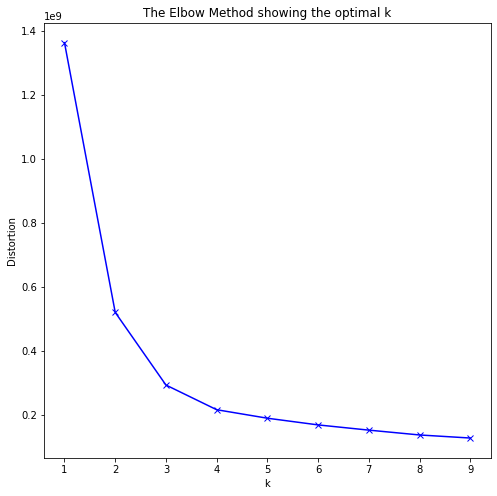

In [ ]:
print('******Kmeans******')
#num_cls = 5
distortions = []
K = range(1,10)
for num_cls in K:
  kmeans = KMeans(n_clusters=num_cls)
  kmeans.fit(samples)
  distortions.append(kmeans.inertia_)
#kf = KFold(n_splits=4)



#print(kmeans.labels_)
#predictions = kmeans.predict(samples[test_index])
plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
print('******Kmeans******')
num_cls = 4
kmeans = KMeans(n_clusters=num_cls)
kmeans.fit(samples)

******Kmeans******


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
#print(kmeans.cluster_centers_)
centers = kmeans.cluster_centers_
X_dist = kmeans.transform(samples)
print(X_dist)
print(kmeans.labels_)
center_dists = np.array([X_dist[i][x] for i,x in enumerate(kmeans.labels_)])
print(center_dists)


[[5996.0956859  3482.64574483 4853.6687737  1356.12709705]
 [ 329.39358288 2265.03176178  973.71372069 4444.27120524]
 [ 273.20259726 2370.61241828 1085.81778735 4545.00422224]
 ...
 [ 218.09685343 2643.10911467 1315.74925268 4818.4665173 ]
 [1170.78688616 3713.54954034 2385.28838172 5891.03710806]
 [1010.22290135 3553.56934027 2216.40362851 5732.60726545]]
[3 0 0 0 0 0 0 0 0 0 1 2 2 0 0 0 0 3 0 0 0 2 0 2 0 3 2 0 0 3 2 2 0 2 2 0 2
 0 0 2 0 2 1 2 0 2 0 3 1 0 0 0 0 0 3 1 2 2 1 1 0 0 0 0 2 0 2 0 1 1 1 2 1 2
 1 1 2 0 2 0 2 2 1 1 0 3 2 2 0 0 0 0 2 2 0 1 2 1 3 3 2 2 0 2 1 0 2 0 2 2 0
 2 1 0 1 0 3 2 2 0 0 2 2 0 2 2 3 2 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0
 0 0 2 0 0 0 2 2 2 2 2 2 2 0 2 0 1 2 2 0 2 0 0 0 2 1 3 1 2 0 0 0 0 3 1 2 0
 0 3 0 3 0 2 2 0 0 2 0 0 0 0 0 2 2 1 1 0 1 0 2 0 0 0 0 1 2 0 2 0 0 0 1 2 2
 2 1 2 1 0 0 0 1 0 0 0 1 0 0 0 0 1 2 0 0 0 1 0 2 3 2 0 2 1 1 3 0 1 0 1 1 1
 2 1 1 1 2 3 0 2 0 1 1 2 2 0 3 0 0 0 0 0 0 1 2 2 0 2 0 0 0 0 2 0 2 0 0 0 0
 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0

In [ ]:
import pandas as pd
# initialise data of lists.
rsult_data = {'eNodeB':eNodeBs,
        'Group':kmeans.labels_,
        'Distance':center_dists}
result_df = pd.DataFrame(data=rsult_data)
result_df.to_csv('result_clustering.csv', index=False)

In [ ]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(samples)

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
print(principalComponents.shape)

(563, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Principal Component 2')

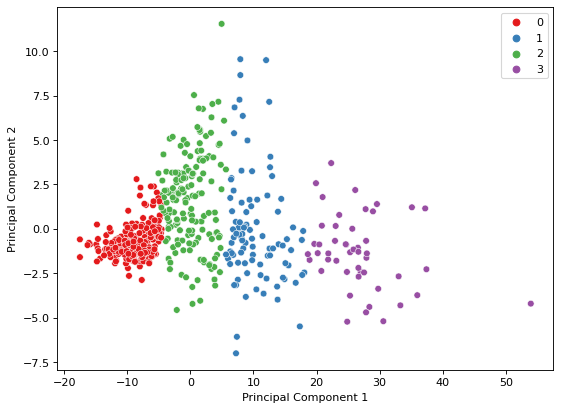

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
a = 20
b = 21
figure(figsize=(8, 6), dpi=80)
#sns.scatterplot(kmeans.cluster_centers_[:,a], kmeans.cluster_centers_[:,b], marker='+', color='black', s=200);
sns.scatterplot(principalComponents[:,0], principalComponents[:,1], hue=kmeans.labels_, 
                palette=sns.color_palette("Set1", n_colors=num_cls));
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")